# Decomposition

https://towardsdatascience.com/time-series-from-scratch-decomposing-time-series-data-7b7ad0c30fe7


Time series data can exhibit a variety of patterns, and it is often helpful to split a time series into several components, each representing an underlying pattern category [1] .This is called decomposition. Time series can be decomposed in three key components:

1. **Trend ($T_{t}$):** represents the trend component, which captures the long-term movement or overall direction of the time series

3. **Seasonal ($S_{t}$):** Seasonality describes recurring patterns that take place within specific time intervals. For example, patterns may happen daily, weekly, monthly, or bi-annually. 

4. **Residu ($R_{t}$):** Random variations in the time series that cannot be explained by trend, or seasonality. Sometimes this is called **noise**.


The `statsmodels.tsa.seasonal_decompose()` function in the statsmodels library is typically used for time series decomposition, which involves breaking down a time series into its individual components, such as trend, seasonality, and residuals



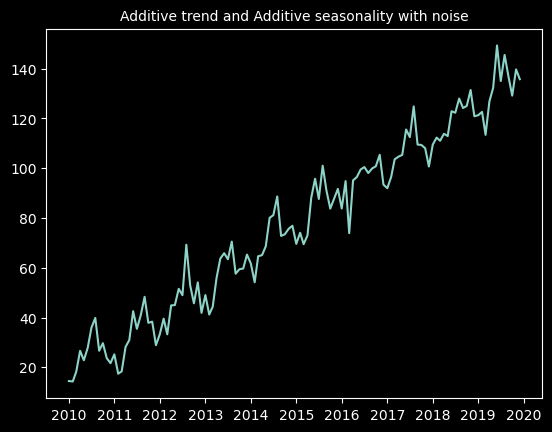

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Terms to be added to single season for seasonality effect
seasonal_adders = [11, 13, 12, 15, 19, 23, 21, 28, 20, 17, 15, 12]

# Generate random noise
np.random.seed(42)  # Set seed for reproducibility
noise = np.random.normal(0, 5, 120)  

# Imitate 10 (10 * 12 months) years of data
x_range = np.arange(1, 121)

time_series = []
# Split into 10 chunks - 1 year each
for chunk in np.split(x_range, 10):
    for i, val in enumerate(chunk):
        # Add value to seasonal scalar and add random noise
        time_series.append(val + seasonal_adders[i] + noise[val - 1])

# Convert to DataFrame
df_aa = pd.DataFrame(
    data={'y': time_series},
    index=pd.date_range(start='2010-01-01', freq='MS', periods=120)
)

# Plot
plt.style.use('dark_background')
plt.title('Additive trend and Additive seasonality with noise', size=10)
plt.plot(df_aa)
# plt.savefig('df_aa.png')
plt.show()

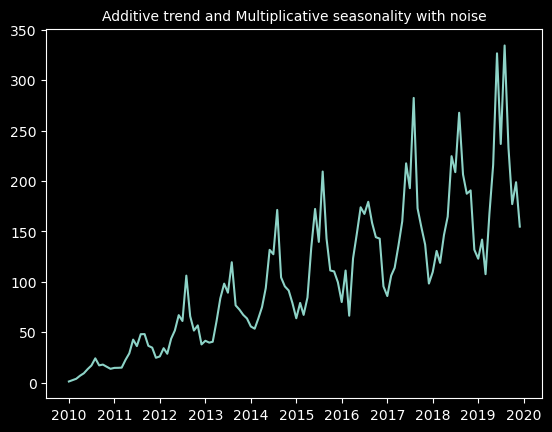

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Single season multiplier factors - for seasonality effect
seasonal_multipliers = [1.1, 1.3, 1.2, 1.5, 1.9, 2.3, 2.1, 2.8, 2.0, 1.7, 1.5, 1.2]

# Generate random noise
np.random.seed(42)  # Set seed for reproducibility
noise = np.random.normal(0, 0.1, 120)  # Adjust the scale (0.1 in this case) as needed

# Imitate 10 years of data
xs = np.arange(1, 121)

time_series = []
# Split into 10 chunks - 1 year each
for chunk in np.split(xs, 10):
    for i, val in enumerate(chunk):
        # Multiply value with seasonal scalar and add random noise
        time_series.append(val * seasonal_multipliers[i] * (1 + noise[val - 1]))

# Convert to DataFrame
df_am = pd.DataFrame(
    data={'y': time_series},
    index=pd.date_range(start='2010-01-01', freq='MS', periods=120)
)

# Plot
plt.style.use('dark_background')
plt.title('Additive trend and Multiplicative seasonality with noise', size=10)
plt.plot(df_am)
# plt.savefig('df_am.png')
plt.show()

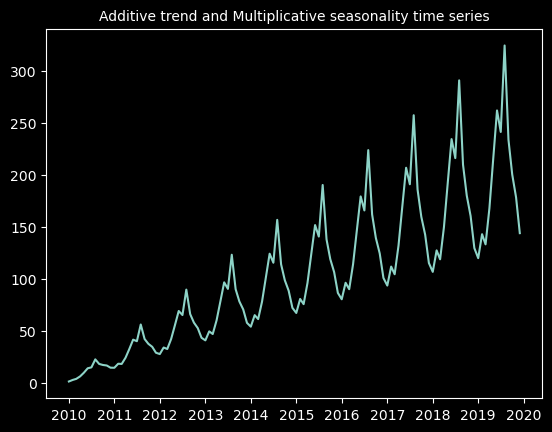

In [2]:
# Single season multiplier factors - for seasonality effect
seasonal_multipliers = [1.1, 1.3, 1.2, 1.5, 1.9, 2.3, 2.1, 2.8, 2.0, 1.7, 1.5, 1.2]
# Immitate 10 years of data
xs = np.arange(1, 121)

time_series = []
# Split to 10 chunks - 1 year each
for chunk in np.split(xs, 10):
    for i, val in enumerate(chunk):
        # Multiply value with seasonal scalar
        time_series.append(val * seasonal_multipliers[i])
        
# Convert to DataFrame
df_am = pd.DataFrame(
    data={'y': time_series}, 
    index=pd.date_range(start='2010-01-01', freq='MS', periods=120)
)

# Plot
plt.style.use('dark_background')
plt.title('Additive trend and Multiplicative seasonality time series', size=10)
plt.plot(df_am)
# plt.savefig('Multiplicative_plot.png')

Additive trend and multiplicative seasonality

Additive trend means the trend is linear (straight line), and multiplicative seasonality means there are changes to widths or heights of seasonal periods over time.

Dataset

K, ANKITHA; D H, MANJAIAH ; M, Kartik (2020), “Data for: Clinical Mastitis in Cows based on Udder Parameter using Internet of Things (IoT)”, Mendeley Data, V2, doi: 10.17632/kbvcdw5b4m.2

In [3]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt

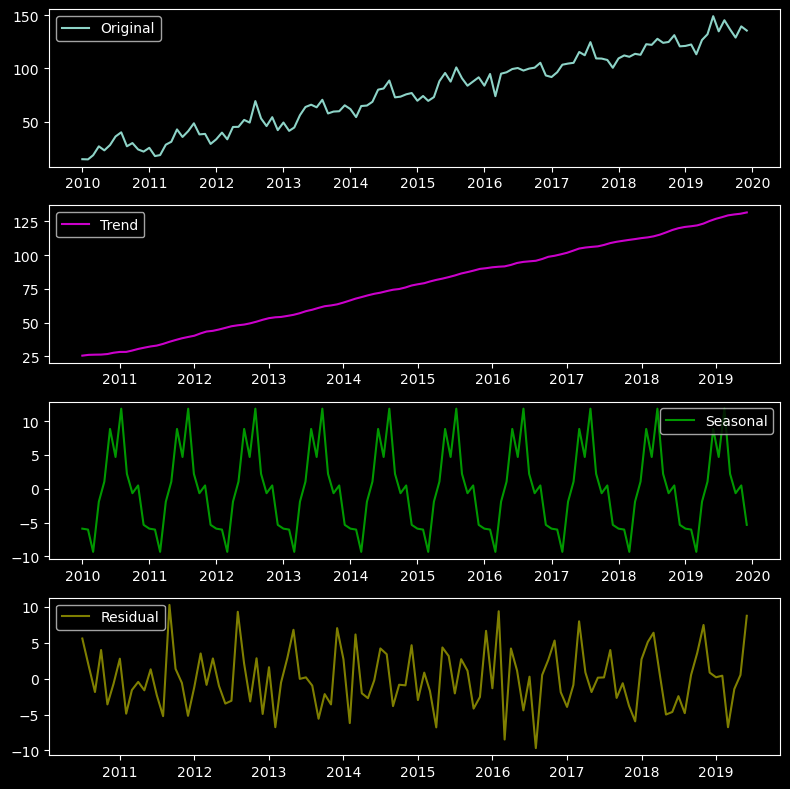

In [8]:

result = sm.tsa.seasonal_decompose(df_aa, model='additive')
plt.style.use('dark_background')
# Plot the original time series
plt.figure(figsize=(8, 8))
plt.subplot(411)
plt.plot(df_aa, label='Original')
plt.legend()

# Plot the trend component
plt.subplot(412)
plt.plot(result.trend, label='Trend', color = 'magenta', alpha = 0.8)
plt.legend()

# Plot the seasonal component
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal', color = 'lime', alpha = 0.6)
plt.legend()

# Plot the residual component
plt.subplot(414)
plt.plot(result.resid, label='Residual', color = 'yellow', alpha = 0.5)
plt.legend()

plt.tight_layout()
plt.savefig('seasonal_decomposition_plot.png')
plt.show()

In an additive model, a time series can be expressed as:

$$y_{t} = T_{t}  + S_{t} + R_{t}$$
 
where $y_{t}$ is the data at time $t$

The additive model represents the time series as the sum of its individual components: trend, seasonal, and noise (residual). By adding these components together, you can reconstruct the original time series data.

This model is necessary for time series data where the seasonal fluctuations are consistent in their amplitude across the entire time series. It’s a good option when seasonal patterns indicate a constant degree of variation compared to the overall data level.[3]


While in a multiplicative model, it takes the form:

$$y_{t} = T_{t} \times S_{t} \times R_{t}$$


The choice between additive and multiplicative decomposition depends on the nature of the time series data. Some time series show a constant level (the average value of the time series over time) of seasonality and variability across different levels, making an additive model suitable. Others may show a proportional relationship, with the amplitude of the seasonal component increasing or decreasing with the level of the time series, making a multiplicative model more appropriate. 


The decision is often based on visual inspection of the time series plot and analysis of the variance of the data at different levels. 


1. Hyndman, R.J., & Athanasopoulos, G. (2018) Forecasting: principles and practice, 2nd edition, OTexts: Melbourne, Australia. OTexts.com/fpp2. Accessed on 27-01-2024

2. https://en.wikipedia.org/wiki/Decomposition_of_time_series Accessed on 27-01-2024

3. https://www.influxdata.com/blog/time-series-decomposition/ Accessed on 27-01-2024
